# Plot Results of Comparison
The purpose of the plot is to compare the performance of different methods, and show how their accuracy changes as a function of training set size.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import sem
import pandas as pd
import numpy as np
import json

In [2]:
plot_width = 89 / 25.4
plot_height = plot_width * 3 / 4
font_size = 12

## Load in the Results
This JSON file contains the number of QH that were found to be stable for many different methods as a function of training set size.

In [21]:
raw_data = json.load(open('test-results.json'))

In [22]:
with open('faber-result.json', 'r') as fp:
    raw_data['Faber\nMethod'] = json.load(fp)

In [23]:
with open('dmsp.json', 'r') as fp:
    raw_data['DMSP'] = json.load(fp)

## Compute Averages
Get the average performance over all of the tests

In [24]:
results = []
for method, tests in raw_data.items():
    for size, scores in tests.items():
        results.append({
            'method': method,
            'size': int(size),
            'mean': np.mean(scores),
            'sem': sem(scores) 
        })
results = pd.DataFrame(results)

Print out performance at 1 QH and 1000 QHs (used in discussion in text)

In [25]:
results.query('size == 1').sort_values('mean')

,mean,method,sem,size
24,0.00,Faber\nMethod,0.000000,1
29,0.00,DMSP,0.000000,1
12,0.12,"Ward,\nonly QH",0.066332,1
0,0.24,Random\nSearch,0.104563,1
6,0.88,Electron\nCounting,0.185472,1
18,7.64,"Ward,\nall OQMD",0.446766,1


In [26]:
results.query('size == 1000').sort_values('mean')

,mean,method,sem,size
3,0.16,Random\nSearch,0.074833,1000
9,0.96,Electron\nCounting,0.177764,1000
32,2.84,DMSP,0.531288,1000
15,3.64,"Ward,\nonly QH",0.355340,1000
21,7.64,"Ward,\nall OQMD",0.450481,1000
27,11.08,Faber\nMethod,0.856193,1000


In [27]:
results.query('size == 10000').sort_values('mean')

,mean,method,sem,size
4,0.08,Random\nSearch,0.055377,10000
10,0.64,Electron\nCounting,0.127541,10000
16,11.28,"Ward,\nonly QH",0.581722,10000
22,11.68,"Ward,\nall OQMD",0.599222,10000
33,12.48,DMSP,0.630132,10000
28,14.04,Faber\nMethod,0.777775,10000


In [28]:
results.query('size == 75000').sort_values('mean')

,mean,method,sem,size
5,0.12,Random\nSearch,0.066332,75000
11,0.72,Electron\nCounting,0.187261,75000
34,18.44,DMSP,0.580460,75000
23,31.68,"Ward,\nall OQMD",0.828090,75000
17,31.96,"Ward,\nonly QH",0.769155,75000


## Plot the Results
Make a plot with error bars

Define the plot styles

In [29]:
plot_style = dict([(method, {'linestyle': '--', 'marker': 'o', 'color': 'b',}) for method in raw_data.keys()])

In [30]:
plot_style['Random\nSearch']['color'] = 'k'
plot_style['Electron\nCounting']['color'] = 'grey'

plot_style['Ward,\nonly QH']['marker'] = 's'
plot_style['Ward,\nall OQMD']['marker'] = 's'
plot_style['Ward,\nall OQMD']['linestyle'] = '-'

plot_style['Faber\nMethod']['color'] = 'r'
plot_style['Faber\nMethod']['marker'] = 'v'
plot_style['Faber\nMethod']['linestyle'] = '-'

plot_style['DMSP']['linestyle'] = ':'
plot_style['DMSP']['marker'] = '^'
plot_style['DMSP']['color'] = 'green'

Make a lookup table for shorter names

In [31]:
method_name = dict([(m,m.replace('\n', ' ')) for m in raw_data.keys()])

In [32]:
method_name['Random\nSearch'] = 'Random'
method_name['Electron\nCounting'] = 'Heuristic'
method_name['Ward,\nonly QH'] = 'Ward, QH'
method_name['Ward,\nall OQMD'] = 'Ward'
method_name['Faber\nMethod'] = 'Faber'

Make the plot

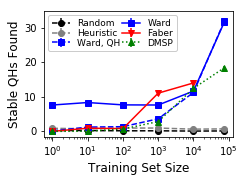

In [37]:
fig, ax = plt.subplots()

for method in raw_data.keys():
    my_results = results[results['method'] == method]
    ax.errorbar(my_results['size'], my_results['mean'], yerr=my_results['sem'],
                label=method_name[method], **plot_style[method])

ax.set_xscale('log')
ax.set_ylim(min(ax.get_ylim()), 35)

ax.legend(ncol=2, fontsize=font_size*0.75, loc='upper left',
          labelspacing=0.1, columnspacing=0.2,
          facecolor='w', framealpha=1)

ax.set_ylabel('Stable QHs Found', fontsize=font_size)
ax.set_xlabel('Training Set Size', fontsize=font_size)

fig.set_size_inches(plot_width, plot_height)
fig.tight_layout()
fig.savefig('search-method-comparison.png', dpi=320)
fig.savefig('search-method-comparison.pdf')